# Data Retrieval

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import stats
from datetime import datetime
import missingno as msno
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point


In [2]:
gdf_vn = gpd.read_file("./maps/vietnam/gadm41_VNM_1.shp")  
gadm = gpd.read_file("./maps/vietnam/gadm41_VNM_2.shp")   # Level 2
gadm = gadm.to_crs("EPSG:4326")  

In [3]:
plt.style.use("ggplot")
sns.set_theme()

In [4]:
df=pd.read_csv('..\data\processing\processed_light.csv')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87125 entries, 0 to 87124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               87125 non-null  object 
 1   price             74572 non-null  float64
 2   price(Milion/m2)  74572 non-null  float64
 3   area              87125 non-null  float64
 4   n_Bedrooms        50127 non-null  float64
 5   n_Bathrooms       47180 non-null  float64
 6   n_Floors          37130 non-null  float64
 7   house_dir         26777 non-null  object 
 8   balcony_dir       14999 non-null  object 
 9   frontage          44612 non-null  float64
 10  driveway          40092 non-null  float64
 11  legal_c           75316 non-null  object 
 12  furniture_c       39117 non-null  object 
 13  project           30461 non-null  object 
 14  lat               87105 non-null  float64
 15  lon               87105 non-null  float64
 16  types             87125 non-null  object

In [6]:
print(df.shape)

(87125, 18)


In [7]:
missing = df.isnull().sum().sort_values(ascending=False)
missing_rate = (df.isnull().sum() / len(df) * 100).sort_values(ascending=False)

missing_df = pd.DataFrame({
    'missing': missing,
    'missing_rate_%': missing_rate
})
missing_df

,missing,missing_rate_%
balcony_dir,72126,82.784505
house_dir,60348,69.265997
project,56664,65.037590
n_Floors,49995,57.383070
furniture_c,48008,55.102439
driveway,47033,53.983357
frontage,42513,48.795409
n_Bathrooms,39945,45.847920
n_Bedrooms,36998,42.465423
price(Milion/m2),12553,14.408034


In [8]:
df.describe()

,price,price(Milion/m2),area,n_Bedrooms,n_Bathrooms,n_Floors,frontage,driveway,lat,lon
count,74572.000000,7.457200e+04,8.712500e+04,50127.000000,47180.000000,37130.000000,44612.000000,40092.000000,87105.000000,87105.000000
mean,18621.969791,1.496250e+02,1.540790e+03,4.174457,3.848453,3.966712,8.512552,11.327058,15.074960,106.491858
std,40312.950486,1.491623e+02,2.371939e+05,5.741043,4.922538,1.923843,16.034013,13.033494,4.855576,2.621252
min,0.100000,6.600000e-07,3.000000e+00,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,4657.500000,5.727273e+01,6.000000e+01,2.000000,2.000000,3.000000,4.000000,5.000000,10.795392,105.843499
50%,8250.000000,1.043762e+02,8.500000e+01,3.000000,3.000000,4.000000,5.000000,8.000000,11.010361,106.652668
75%,17465.000000,1.986325e+02,1.360000e+02,4.000000,4.000000,5.000000,8.000000,13.000000,20.989150,106.736273
max,980000.000000,2.863636e+03,6.687900e+07,255.000000,180.000000,36.000000,930.000000,818.000000,32.696946,112.840453


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87125 entries, 0 to 87124
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   url               87125 non-null  object 
 1   price             74572 non-null  float64
 2   price(Milion/m2)  74572 non-null  float64
 3   area              87125 non-null  float64
 4   n_Bedrooms        50127 non-null  float64
 5   n_Bathrooms       47180 non-null  float64
 6   n_Floors          37130 non-null  float64
 7   house_dir         26777 non-null  object 
 8   balcony_dir       14999 non-null  object 
 9   frontage          44612 non-null  float64
 10  driveway          40092 non-null  float64
 11  legal_c           75316 non-null  object 
 12  furniture_c       39117 non-null  object 
 13  project           30461 non-null  object 
 14  lat               87105 non-null  float64
 15  lon               87105 non-null  float64
 16  types             87125 non-null  object

In [10]:

types = ["nha", "can-ho", "dat", "khac"]
dfs = {}  

for t in types:
    subset = df[df['types'] == t].copy()
    non_empty_cols = subset.columns[subset.notna().sum() > 0]
    subset = subset[non_empty_cols]

    dfs[t] = subset
    print(f"=== types: {t} | Số dòng: {len(subset)} | Số cột: {len(subset.columns)} ===")


=== types: nha | Số dòng: 48514 | Số cột: 18 ===
=== types: can-ho | Số dòng: 17899 | Số cột: 18 ===
=== types: dat | Số dòng: 19690 | Số cột: 13 ===
=== types: khac | Số dòng: 1022 | Số cột: 18 ===


In [11]:
df_c=dfs['can-ho']

In [12]:
df_c

,url,price,price(Milion/m2),area,n_Bedrooms,n_Bathrooms,n_Floors,house_dir,balcony_dir,frontage,driveway,legal_c,furniture_c,project,lat,lon,types,date
0,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,4900.0,72.058824,68.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,NaN,Chung cư Elysian,10.826386,106.818865,can-ho,2025-10-29
1,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,4400.0,69.073783,63.7,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,đầy đủ,The Sapphire-Vinhomes Smart City,21.006202,105.736462,can-ho,2025-11-05
7,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,2990.0,56.415094,53.0,1.0,1.0,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,cơ bản,Q7 Saigon Riverside,10.718852,106.742400,can-ho,2025-11-06
8,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,3700.0,55.223881,67.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Hợp đồng mua bán,cơ bản,Q7 Saigon Riverside,10.718034,106.742393,can-ho,2025-11-08
10,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,5100.0,63.750000,80.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,NaN,Chung cư Elysian,10.826636,106.818949,can-ho,2025-11-10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87110,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,2900.0,50.000000,58.0,2.0,2.0,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,cơ bản,HH4 Linh Đàm,20.963504,105.826413,can-ho,2025-10-30
87112,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,2290.0,40.246046,56.9,2.0,1.0,NaN,NaN,Nam,NaN,NaN,NaN,đầy đủ,Hoàng Huy Commerce,20.830463,106.683575,can-ho,2025-10-30
87114,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,9200.0,99.352052,92.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Có sổ riêng,NaN,The Tresor,10.766880,106.703426,can-ho,2025-10-30
87118,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,NaN,NaN,30.0,1.0,1.0,NaN,Đông - Nam,Đông - Nam,NaN,NaN,Có sổ riêng,cơ bản,Vinhomes Ocean Park 3,20.941443,105.955962,can-ho,2025-10-29


In [13]:
df_c['date'] = pd.to_datetime(df_c['date'])
print(df_c['date'].dtype)

datetime64[ns]


In [14]:

thoi_diem_som_nhat = df_c['date'].min()
thoi_diem_muon_nhat = df_c['date'].max()
print(f"Thời điểm bắt đầu thu thập dữ liệu: {thoi_diem_som_nhat}")
print(f"Thời điểm kết thúc thu thập dữ liệu: {thoi_diem_muon_nhat}")


Thời điểm bắt đầu thu thập dữ liệu: 2025-10-12 00:00:00
Thời điểm kết thúc thu thập dữ liệu: 2025-11-15 00:00:00


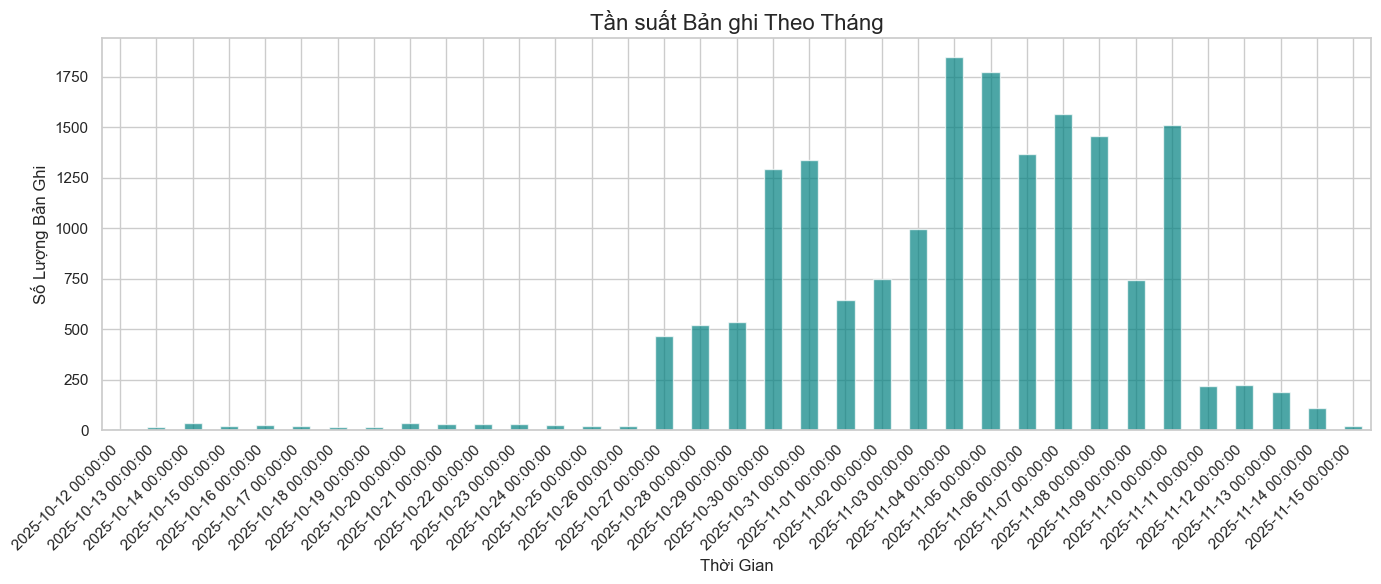

In [15]:
sns.set_style("whitegrid")

# 1. Nhóm theo tháng ('M') và đếm
# Thiết lập cột 'date' làm index tạm thời
frequency_data = df_c.set_index('date').resample('D').size()

# 2. Vẽ biểu đồ cột
plt.figure(figsize=(14, 6))
frequency_data.plot(kind='bar', color='teal', alpha=0.7)

# Thiết lập nhãn và tiêu đề
plt.title('Tần suất Bản ghi Theo Tháng', fontsize=16)
plt.xlabel('Thời Gian', fontsize=12)
plt.ylabel('Số Lượng Bản Ghi', fontsize=12)
plt.xticks(rotation=45, ha='right')

plt.tight_layout()
plt.show()

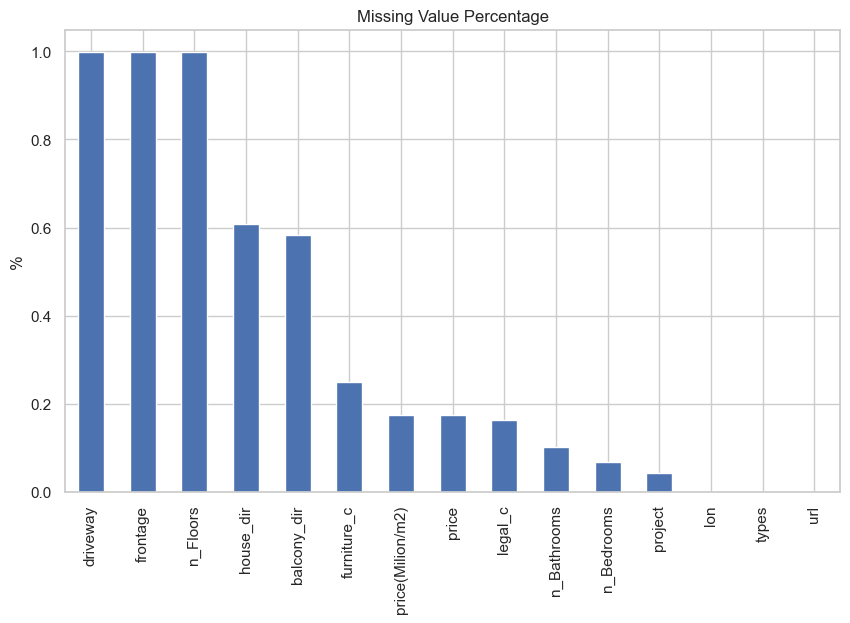

In [16]:
missing = df_c.isnull().mean().sort_values(ascending=False)
plt.figure(figsize=(10,6))
missing.head(15).plot.bar()
plt.title("Missing Value Percentage")
plt.ylabel("%")
plt.show()

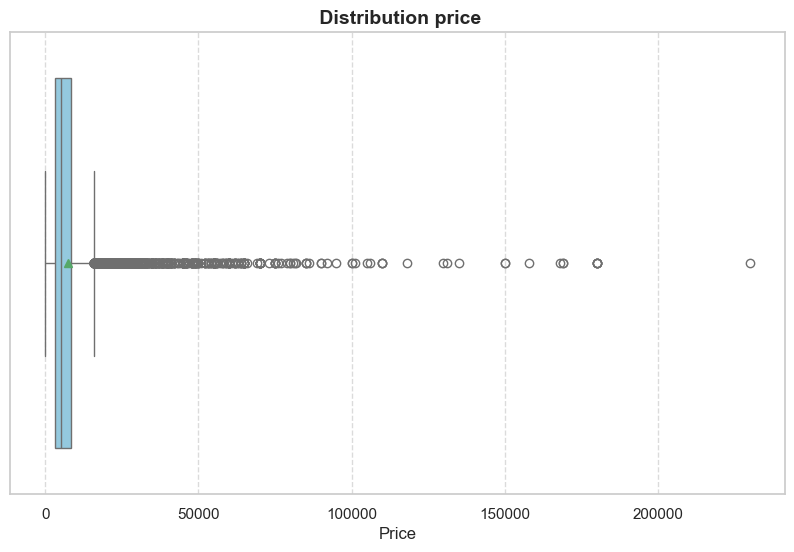

In [17]:

plt.figure(figsize=(10, 6))

# Vẽ Box Plot
# showmeans=True: Hiển thị thêm dấu tam giác đánh dấu giá trị trung bình
sns.boxplot(x=df_c['price'], color='skyblue', showmeans=True)

plt.title(' Distribution price', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)

plt.show()

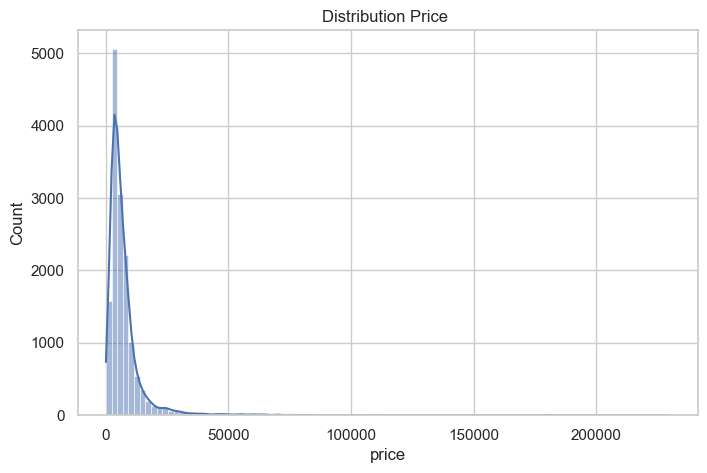

In [18]:
plt.figure(figsize=(8,5))
sns.histplot(df_c['price'], bins=100, kde=True)
plt.title("Distribution Price ")
plt.show()


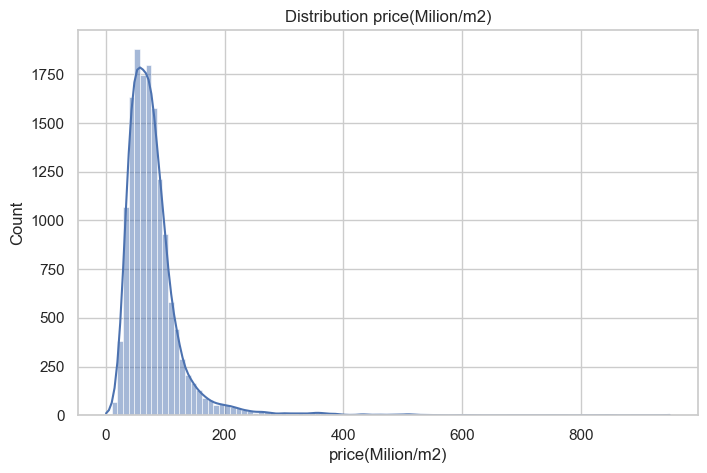

In [19]:
plt.figure(figsize=(8,5))
sns.histplot(df_c['price(Milion/m2)'], bins=100, kde=True)
plt.title("Distribution price(Milion/m2)")
plt.show()


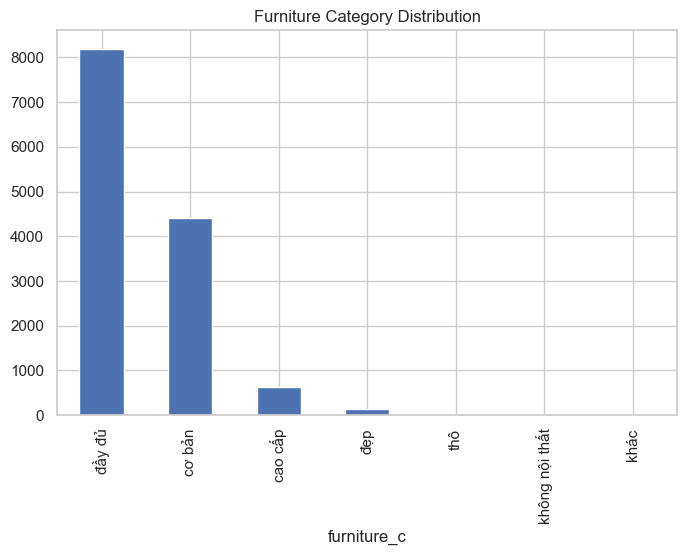

In [20]:
plt.figure(figsize=(8,5))
df_c['furniture_c'].value_counts().plot.bar()
plt.title("Furniture Category Distribution")
plt.show()


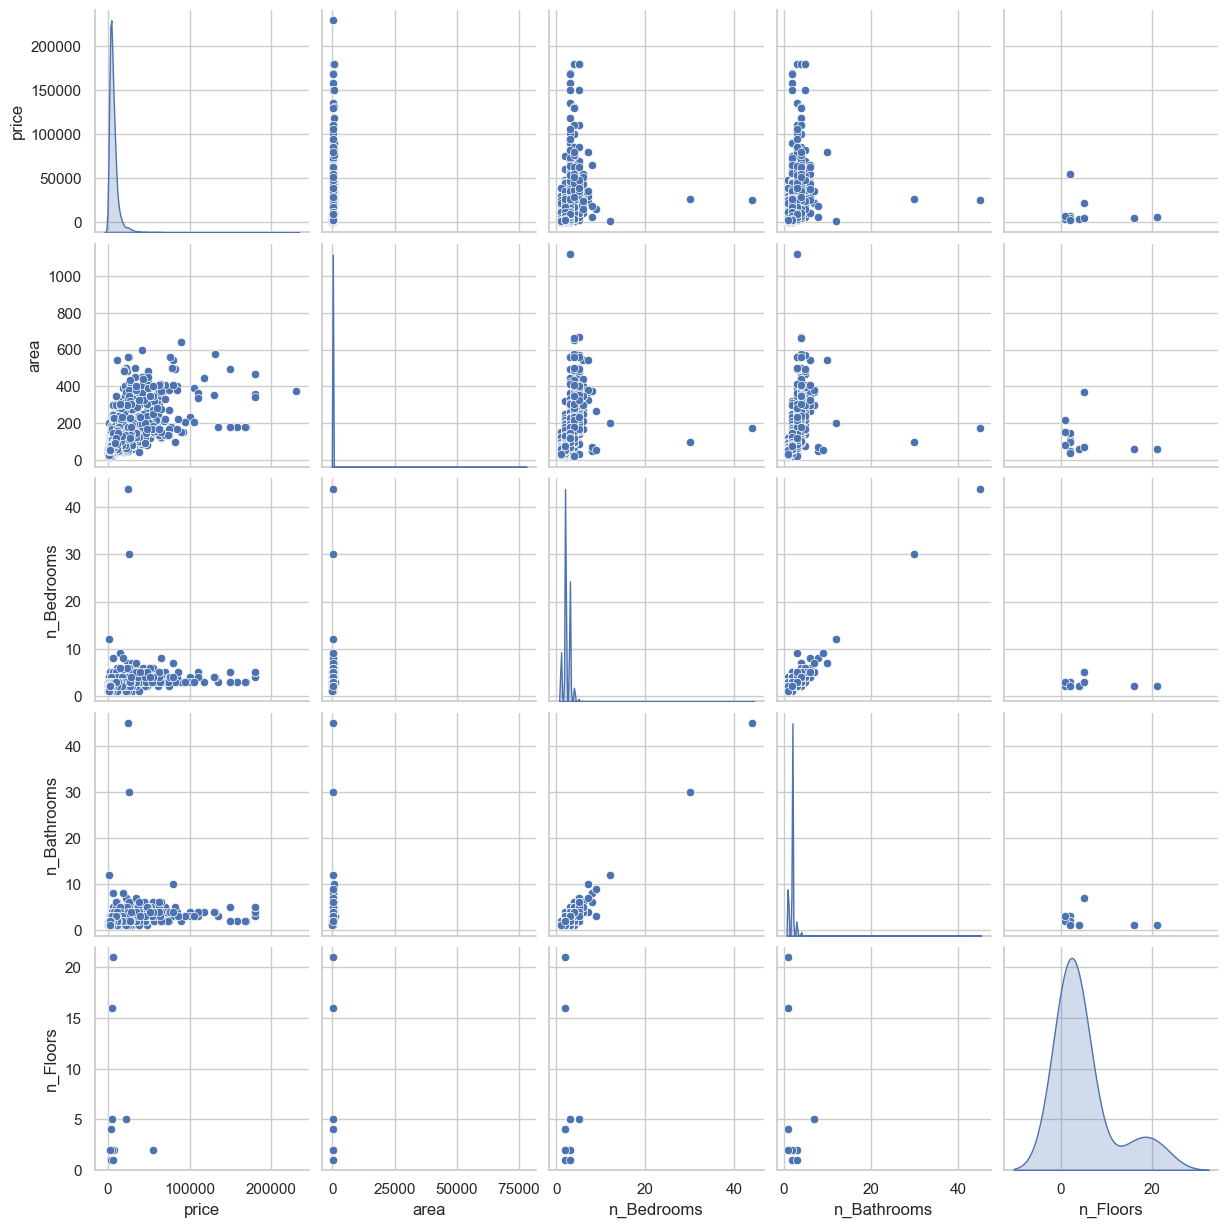

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

cols = [
    "price",
    "area",
    "n_Bedrooms",
    "n_Bathrooms",
    "n_Floors"
]

sns.pairplot(df_c[cols], diag_kind="kde")
plt.show()


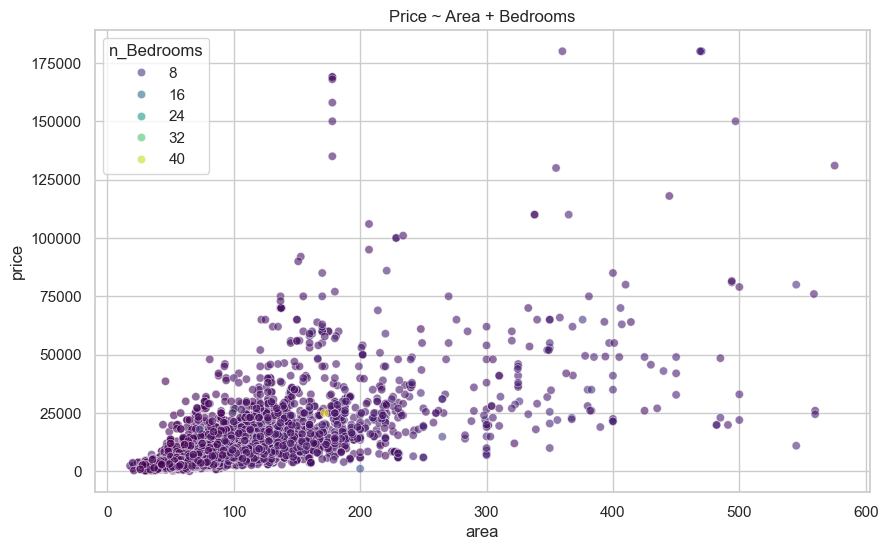

In [22]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_c, x="area", y="price", 
                hue="n_Bedrooms", palette="viridis", alpha=0.6)
plt.title("Price ~ Area + Bedrooms")
plt.show()


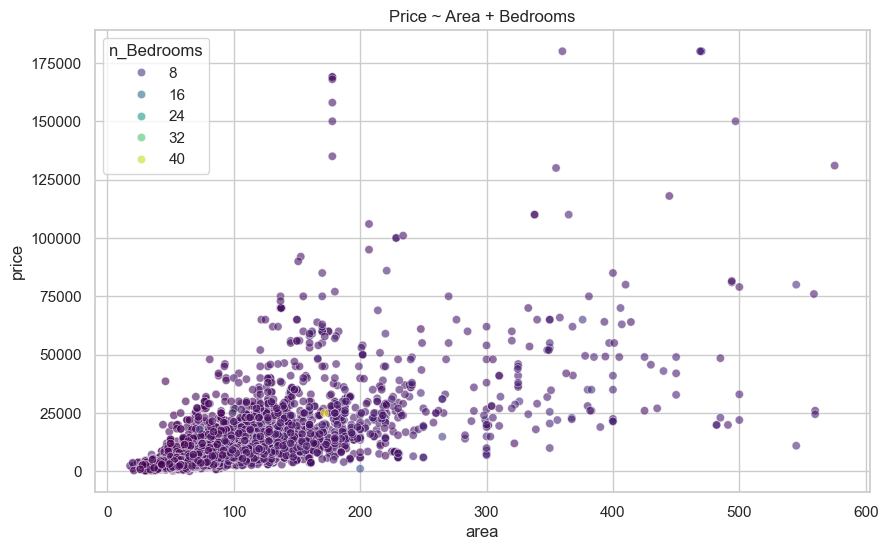

In [23]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_c, x="area", y="price", 
                hue="n_Bedrooms", palette="viridis", alpha=0.6)
plt.title("Price ~ Area + Bedrooms")
plt.show()


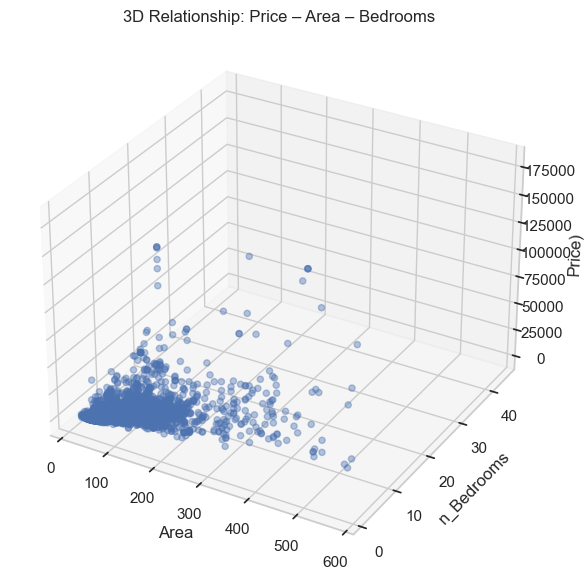

In [24]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df_c['area'], df_c['n_Bedrooms'], df_c['price'], alpha=0.4)

ax.set_xlabel('Area')
ax.set_ylabel('n_Bedrooms')
ax.set_zlabel('Price)')
plt.title("3D Relationship: Price – Area – Bedrooms")
plt.show()


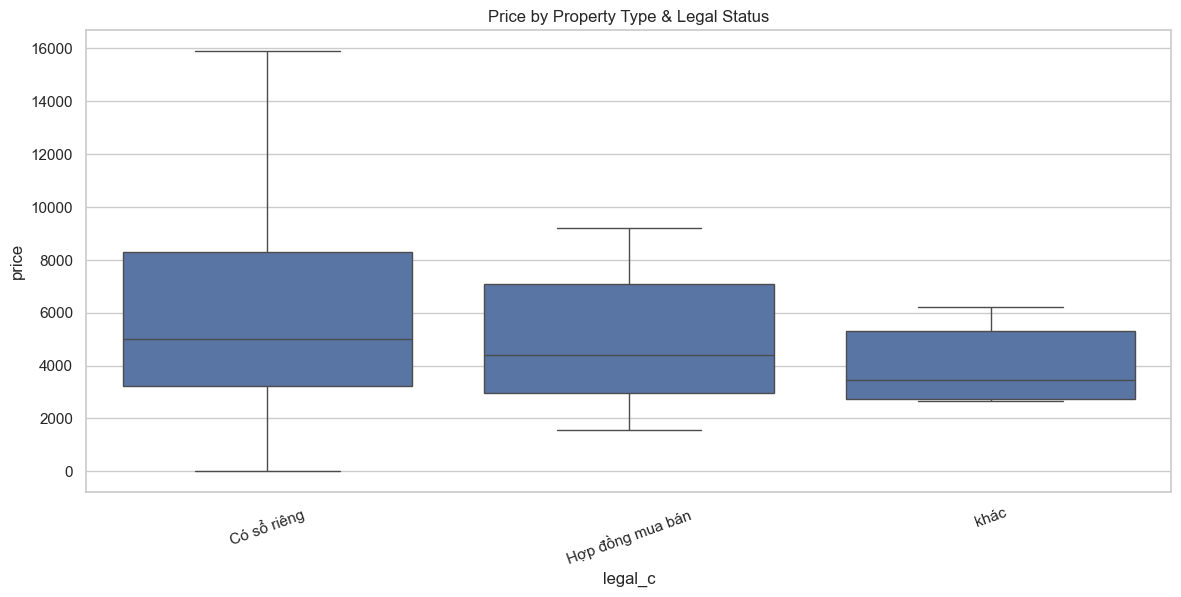

In [25]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_c, x='legal_c', y='price', showfliers=False)
plt.title("Price by Property Type & Legal Status")
plt.xticks(rotation=20)
plt.show()


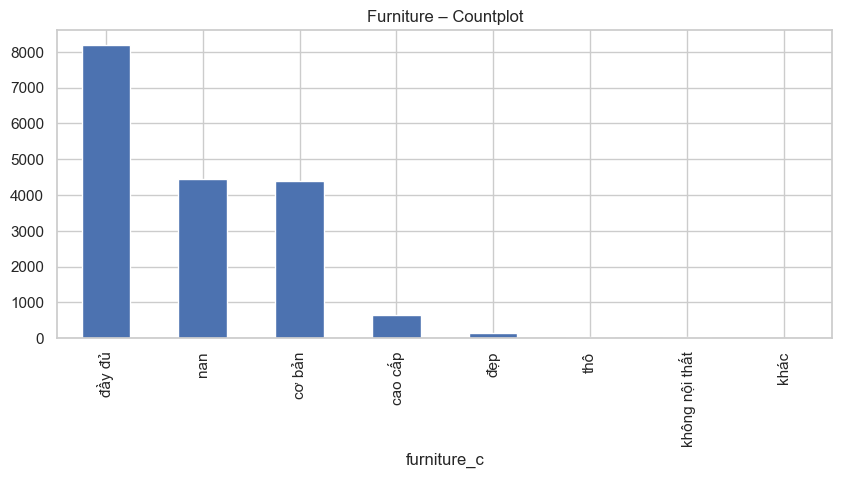

In [26]:
plt.figure(figsize=(10,4))
df_c["furniture_c"].value_counts(dropna=False).plot(kind="bar")
plt.title("Furniture – Countplot")
plt.show()


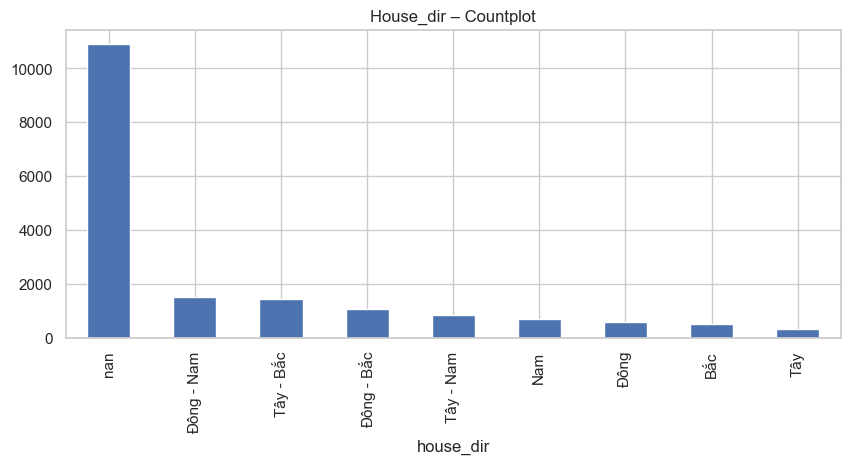

In [27]:
plt.figure(figsize=(10,4))
df_c["house_dir"].value_counts(dropna=False).plot(kind="bar")
plt.title("House_dir – Countplot")
plt.show()

#  handing Outlier

In [28]:
gdf = gpd.GeoDataFrame(
    df_c, 
    geometry=gpd.points_from_xy(df_c['lon'], df_c['lat']),
    crs="EPSG:4326"
)

# --- Spatial Join để gán tỉnh + quận ---
merged = gpd.sjoin(
    gdf, 
    gadm[['NAME_1', 'NAME_2', 'geometry']], 
    how="left", 
    predicate='within'
)

# --- HÀM xử lý outlier theo IQR ---
def remove_outlier_IQR(group, col='price'):
    Q1 = group[col].quantile(0.25)
    Q3 = group[col].quantile(0.75)
    IQR = Q3 - Q1
    
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    
    return group[(group[col] >= lower) & (group[col] <= upper)]

# --- OUTLIER theo từng QUẬN + TỪNG types ---
clean = (
    merged
    .groupby(["NAME_2", "types"], group_keys=False)
    .apply(remove_outlier_IQR)
)

print("After:", len(merged))
print("Before proc:", len(clean))

After: 17899
Before proc: 14000


C:\Users\phamh\AppData\Local\Temp\ipykernel_20184\1667845691.py:30: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  .apply(remove_outlier_IQR)


In [29]:
price_by_district = clean.groupby("NAME_1")["price"].describe().sort_values("mean")
print(price_by_district.head(50))

                    count         mean          std     min     25%     50%  \
NAME_1                                                                        
Tiền Giang            1.0   898.000000          NaN   898.0   898.0   898.0   
Ninh Thuận            3.0   991.000000   510.100970   693.0   696.5   700.0   
Long An              92.0  1445.978261   236.954393   790.0  1287.5  1410.0   
Hà Nam               97.0  1617.319588   414.350685  1000.0  1200.0  1600.0   
Bình Định            51.0  1839.686275   803.105111   454.0  1250.0  1790.0   
Đồng Nai             50.0  1877.960000   665.333366   470.0  1645.0  1790.0   
Thái Nguyên          22.0  1963.181818   671.660248  1350.0  1600.0  1800.0   
Hà Tĩnh               1.0  2000.000000          NaN  2000.0  2000.0  2000.0   
Hải Dương            30.0  2235.333333   681.057663   800.0  1662.5  2500.0   
Thanh Hóa            50.0  2274.400000   718.561943   780.0  1880.0  2100.0   
Bắc Giang            28.0  2342.142857   366.286238 

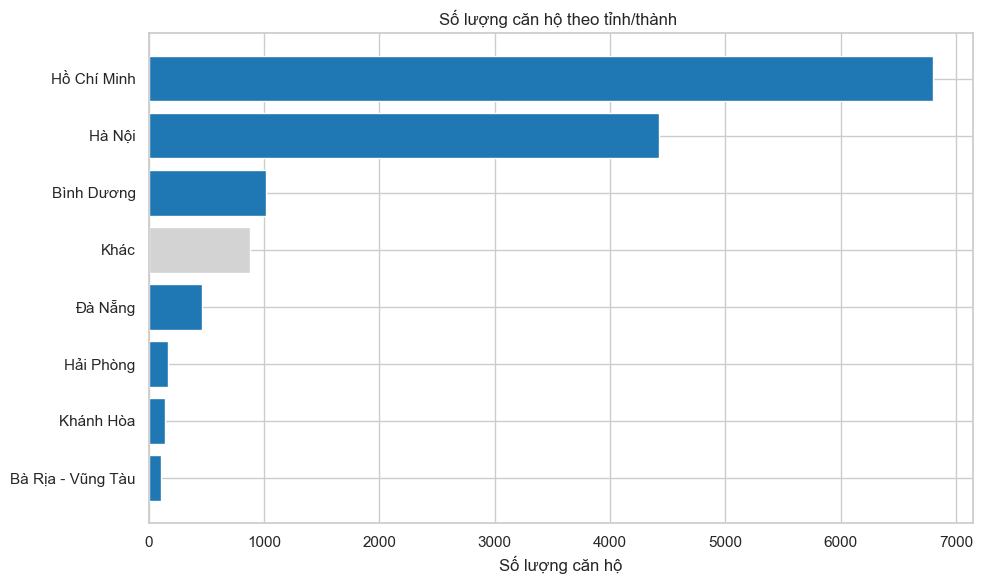

In [83]:
import matplotlib.pyplot as plt

priority_provinces = ['Hồ Chí Minh', 'Hà Nội', 'Bình Dương', 'Đà Nẵng', 'Khánh Hòa', 
                      'Bà Rịa - Vũng Tàu', 'Hải Phòng']

# 1. Đếm số lượng nhà theo tỉnh
count_by_province = clean.groupby("NAME_1")["price"].count()

# 2. Gộp các tỉnh khác thành 'Khác'
count_by_province_grouped = count_by_province.reset_index()
count_by_province_grouped['NAME_1'] = count_by_province_grouped['NAME_1'].apply(
    lambda x: x if x in priority_provinces else 'Khác'
)

# 3. Tổng hợp lại sau khi gộp
count_by_province_grouped = count_by_province_grouped.groupby('NAME_1')["price"].sum()

# 4. Sắp xếp giảm dần
count_by_province_grouped = count_by_province_grouped.sort_values(ascending=True)  # ngang nên sắp xếp từ dưới lên

# 5. Vẽ horizontal bar chart
plt.figure(figsize=(10,6))

colors = ['#1f77b4' if x != 'Khác' else '#d3d3d3' for x in count_by_province_grouped.index]

plt.barh(count_by_province_grouped.index, count_by_province_grouped.values, color=colors)
plt.xlabel("Số lượng căn hộ")
plt.title("Số lượng căn hộ theo tỉnh/thành ")
plt.tight_layout()
plt.show()


In [30]:
clean.shape

(14000, 22)

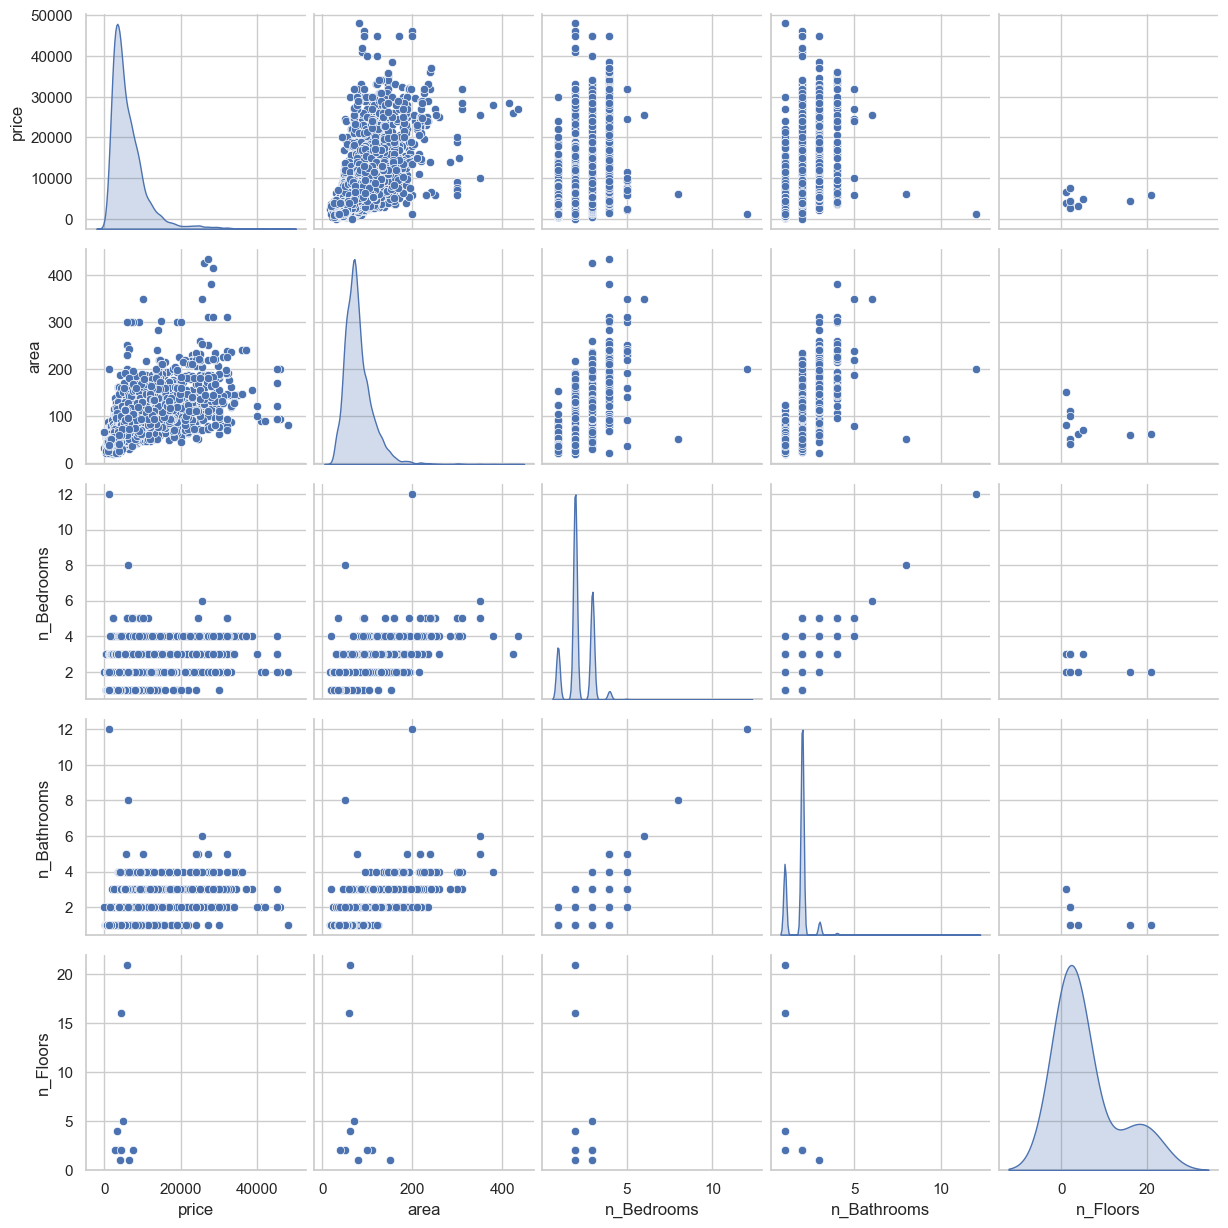

In [31]:
cols = [
    "price",
    "area",
    "n_Bedrooms",
    "n_Bathrooms",
    "n_Floors"
]

sns.pairplot(clean[cols], diag_kind="kde")
plt.show()

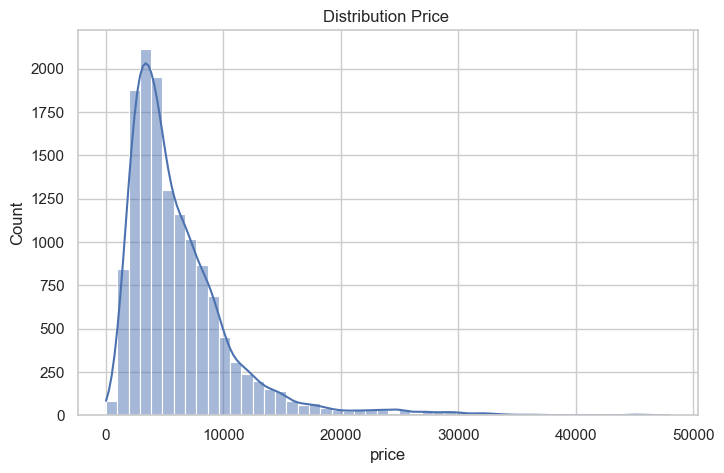

In [32]:
plt.figure(figsize=(8,5))
sns.histplot(clean['price'], bins=50, kde=True)
plt.title("Distribution Price ")
plt.show()


In [33]:
clean.head()

,url,price,price(Milion/m2),area,n_Bedrooms,n_Bathrooms,n_Floors,house_dir,balcony_dir,frontage,...,furniture_c,project,lat,lon,types,date,geometry,index_right,NAME_1,NAME_2
579,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1900.0,31.666667,60.00,2.0,2.0,NaN,NaN,NaN,NaN,...,cơ bản,An Zen Residence,20.845686,106.650384,can-ho,2025-10-27,POINT (106.65038 20.84569),284.0,Hải Phòng,An Dương
14363,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1700.0,34.000000,50.00,1.0,1.0,NaN,Đông - Bắc,Tây - Nam,NaN,...,cơ bản,Khu đô thị PG An Đồng,20.844209,106.648478,can-ho,2025-11-10,POINT (106.64848 20.84421),284.0,Hải Phòng,An Dương
15036,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1770.0,35.400000,50.00,1.0,1.0,NaN,NaN,NaN,NaN,...,cơ bản,An Zen Residence,20.845692,106.649874,can-ho,2025-11-14,POINT (106.64987 20.84569),284.0,Hải Phòng,An Dương
15076,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,700.0,17.073171,41.00,1.0,1.0,NaN,Bắc,Nam,NaN,...,cơ bản,Him Lam Central Park An Hồng,20.908416,106.609306,can-ho,2025-11-10,POINT (106.60931 20.90842),284.0,Hải Phòng,An Dương
18186,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,3140.0,40.230621,78.05,3.0,NaN,NaN,Đông - Nam,Đông - Nam,NaN,...,đầy đủ,An Zen Residence,20.846303,106.650088,can-ho,2025-11-03,POINT (106.65009 20.8463),284.0,Hải Phòng,An Dương


In [34]:
clean.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 14000 entries, 579 to 65172
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   url               14000 non-null  object        
 1   price             14000 non-null  float64       
 2   price(Milion/m2)  14000 non-null  float64       
 3   area              14000 non-null  float64       
 4   n_Bedrooms        13159 non-null  float64       
 5   n_Bathrooms       12738 non-null  float64       
 6   n_Floors          10 non-null     float64       
 7   house_dir         5402 non-null   object        
 8   balcony_dir       5731 non-null   object        
 9   frontage          3 non-null      float64       
 10  driveway          3 non-null      float64       
 11  legal_c           11913 non-null  object        
 12  furniture_c       10633 non-null  object        
 13  project           13347 non-null  object        
 14  lat              

In [35]:
display(clean.describe(include='all').transpose())

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
url,14000,13998,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN
price,14000.0,NaN,NaN,NaN,6221.080614,2.6,3200.0,4900.0,7852.5,48000.0,4704.549816
price(Milion/m2),14000.0,NaN,NaN,NaN,75.547468,0.083871,49.684543,68.755134,90.28296,592.592593,40.708915
area,14000.0,NaN,NaN,NaN,79.077429,18.0,59.4,73.0,93.0,435.0,30.863213
n_Bedrooms,13159.0,NaN,NaN,NaN,2.196747,1.0,2.0,2.0,3.0,12.0,0.706387
n_Bathrooms,12738.0,NaN,NaN,NaN,1.822029,1.0,2.0,2.0,2.0,12.0,0.535579
n_Floors,10.0,NaN,NaN,NaN,5.6,1.0,2.0,2.0,4.75,21.0,7.011102
house_dir,5402,8,Đông - Nam,1127,NaN,NaN,NaN,NaN,NaN,NaN,NaN
balcony_dir,5731,8,Đông - Nam,1779,NaN,NaN,NaN,NaN,NaN,NaN,NaN
frontage,3.0,NaN,NaN,NaN,23.0,3.0,3.5,4.0,33.0,62.0,33.778692


In [36]:
df_c["project"] = clean["project"].notna() & (clean["project"].astype(str).str.strip() != "")

df_c = clean.dropna(subset=['price', 'price(Milion/m2)'])

In [37]:
df_c.shape

(14000, 22)

In [38]:
df_c

,url,price,price(Milion/m2),area,n_Bedrooms,n_Bathrooms,n_Floors,house_dir,balcony_dir,frontage,...,furniture_c,project,lat,lon,types,date,geometry,index_right,NAME_1,NAME_2
579,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1900.0,31.666667,60.00,2.0,2.0,NaN,NaN,NaN,NaN,...,cơ bản,An Zen Residence,20.845686,106.650384,can-ho,2025-10-27,POINT (106.65038 20.84569),284.0,Hải Phòng,An Dương
14363,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1700.0,34.000000,50.00,1.0,1.0,NaN,Đông - Bắc,Tây - Nam,NaN,...,cơ bản,Khu đô thị PG An Đồng,20.844209,106.648478,can-ho,2025-11-10,POINT (106.64848 20.84421),284.0,Hải Phòng,An Dương
15036,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1770.0,35.400000,50.00,1.0,1.0,NaN,NaN,NaN,NaN,...,cơ bản,An Zen Residence,20.845692,106.649874,can-ho,2025-11-14,POINT (106.64987 20.84569),284.0,Hải Phòng,An Dương
15076,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,700.0,17.073171,41.00,1.0,1.0,NaN,Bắc,Nam,NaN,...,cơ bản,Him Lam Central Park An Hồng,20.908416,106.609306,can-ho,2025-11-10,POINT (106.60931 20.90842),284.0,Hải Phòng,An Dương
18186,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,3140.0,40.230621,78.05,3.0,NaN,NaN,Đông - Nam,Đông - Nam,NaN,...,đầy đủ,An Zen Residence,20.846303,106.650088,can-ho,2025-11-03,POINT (106.65009 20.8463),284.0,Hải Phòng,An Dương
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29301,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1240.0,31.000000,40.00,2.0,1.0,NaN,NaN,NaN,NaN,...,cơ bản,The Win City,10.794218,106.502383,can-ho,2025-11-07,POINT (106.50238 10.79422),429.0,Long An,Đức Hòa
35771,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1100.0,24.444444,45.00,2.0,NaN,NaN,NaN,NaN,NaN,...,đầy đủ,NaN,10.807959,106.481381,can-ho,2025-10-27,POINT (106.48138 10.80796),429.0,Long An,Đức Hòa
42013,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1500.0,30.000000,50.00,2.0,2.0,NaN,NaN,NaN,NaN,...,đầy đủ,The Win City,10.807707,106.481105,can-ho,2025-11-07,POINT (106.48111 10.80771),429.0,Long An,Đức Hòa
54337,https://batdongsan.com.vn/ban-can-ho-chung-cu-...,1650.0,33.000000,50.00,2.0,1.0,NaN,Đông - Bắc,Tây - Nam,NaN,...,đầy đủ,The Win City,10.807590,106.481424,can-ho,2025-10-31,POINT (106.48142 10.80759),429.0,Long An,Đức Hòa


frontage            99.978571
driveway            99.978571
n_Floors            99.928571
house_dir           61.414286
balcony_dir         59.064286
furniture_c         24.050000
legal_c             14.907143
n_Bathrooms          9.014286
n_Bedrooms           6.007143
project              4.664286
types                0.000000
NAME_1               0.000000
index_right          0.000000
geometry             0.000000
date                 0.000000
url                  0.000000
lon                  0.000000
lat                  0.000000
price                0.000000
area                 0.000000
price(Milion/m2)     0.000000
NAME_2               0.000000
dtype: float64

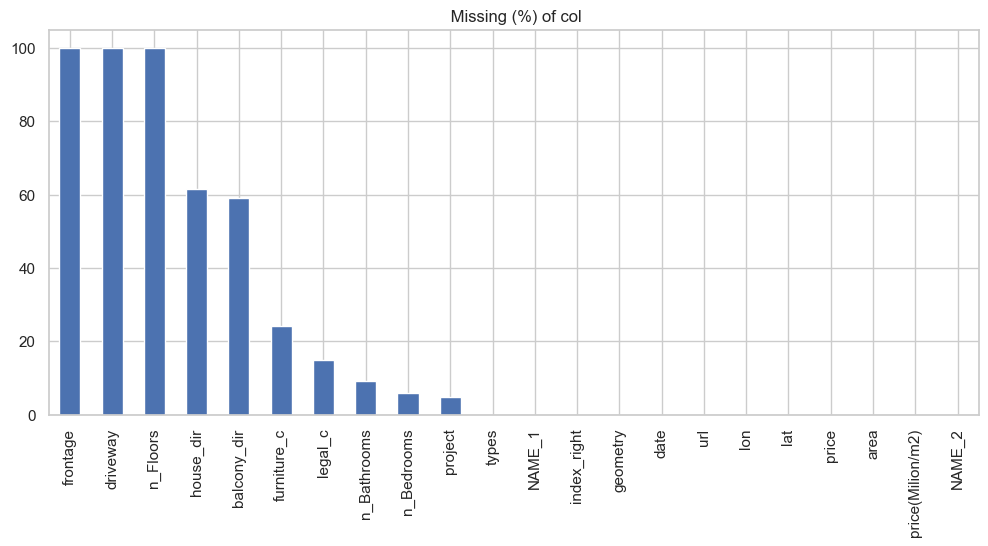

In [39]:

missing = df_c.isna().mean().sort_values(ascending=False) * 100
display(missing)

plt.figure(figsize=(12,5))
missing.plot(kind='bar')
plt.title(" Missing (%) of col")
plt.show()

# Data after processing

C:\Users\phamh\AppData\Local\Temp\ipykernel_20184\1246049729.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


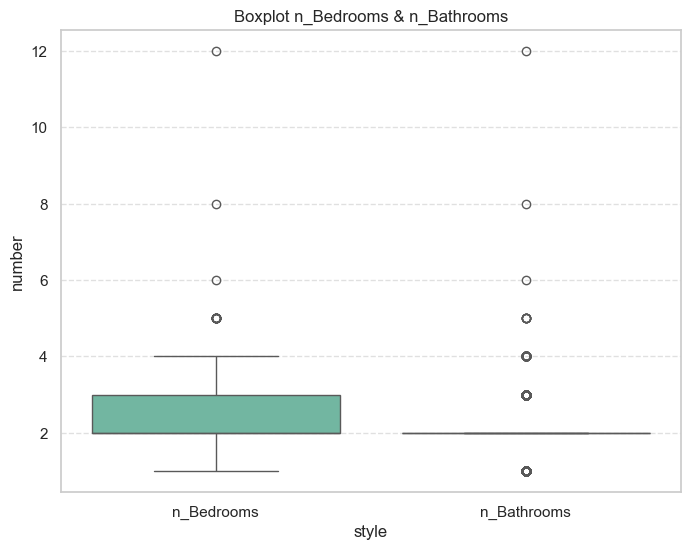

In [71]:

df_plot = clean[['n_Bedrooms', 'n_Bathrooms']]

df_long = df_plot.melt(
    var_name='Loại Phòng', 
    value_name='Số Lượng'
)

plt.figure(figsize=(8, 6))
sns.boxplot(
    x='Loại Phòng', 
    y='Số Lượng', 
    data=df_long, 
    palette="Set2",
)

plt.title('Boxplot n_Bedrooms & n_Bathrooms')
plt.xlabel('style')
plt.ylabel('number')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

In [40]:
clean['project'] = clean['project'].fillna(False).astype(bool)


In [ ]:
df_c = df_c.dropna(subset=['n_Bedrooms', 'n_Bathrooms'])
df_c.loc[:,'project'] = clean['project'].fillna(False).astype(bool)
#df_c.loc[:, 'house_dir'] = df_c['house_dir'].fillna(df_c['balcony_dir'])
#df_c.loc[:, 'balcony_dir'] = df_c['balcony_dir'].fillna(df_c['house_dir'])
df_c.loc[:, 'house_dir'] = df_c['house_dir'].fillna('khác')
df_c.loc[:, 'balcony_dir'] = df_c['balcony_dir'].fillna('khác')
df_c.loc[:, 'legal_c'] = df_c['legal_c'].fillna('khác')
df_c.loc[:, 'furniture_c'] = df_c['furniture_c'].fillna('không nội thất')

In [68]:
df_c.count()

url                 12711
price               12711
price(Milion/m2)    12711
area                12711
n_Bedrooms          12711
n_Bathrooms         12711
n_Floors                8
house_dir           12711
balcony_dir         12711
frontage                3
driveway                3
legal_c             12711
furniture_c         12711
project             12711
lat                 12711
lon                 12711
types               12711
date                12711
geometry            12711
index_right         12711
NAME_1              12711
NAME_2              12711
dtype: int64

In [44]:
df_c['n_Bedrooms'] = pd.cut(
    df_c['n_Bedrooms'],
    bins=[0, 1, 2, 3, 20],     # cắt theo khoảng
    labels=['1', '2', '3', '4+'],
    include_lowest=True
)

In [ ]:
df_c['n_Bedrooms'].value_counts()

n_Bedrooms
2     7029
3     3669
1     1714
4+     299
Name: count, dtype: int64

In [45]:
df_c['n_Bathrooms'] = pd.cut(
    df_c['n_Bathrooms'],
    bins=[0, 1, 2, 3, 20],     # cắt theo khoảng
    labels=['1', '2', '3', '4+'],
    include_lowest=True
)

In [46]:
df_c['n_Bathrooms'].value_counts()

n_Bathrooms
2     9097
1     2981
3      550
4+      83
Name: count, dtype: int64

In [47]:
numeric_cols = [
    "price", "price(Milion/m2)", "area",
    "n_Bedrooms", "n_Bathrooms", "n_Floors",
    "frontage", "driveway"
]

In [48]:
df_c.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 12711 entries, 579 to 65172
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   url               12711 non-null  object        
 1   price             12711 non-null  float64       
 2   price(Milion/m2)  12711 non-null  float64       
 3   area              12711 non-null  float64       
 4   n_Bedrooms        12711 non-null  category      
 5   n_Bathrooms       12711 non-null  category      
 6   n_Floors          8 non-null      float64       
 7   house_dir         12711 non-null  object        
 8   balcony_dir       12711 non-null  object        
 9   frontage          3 non-null      float64       
 10  driveway          3 non-null      float64       
 11  legal_c           12711 non-null  object        
 12  furniture_c       12711 non-null  object        
 13  project           12711 non-null  object        
 14  lat              

In [49]:
df_c['project'].value_counts()

project
True     12141
False      570
Name: count, dtype: int64

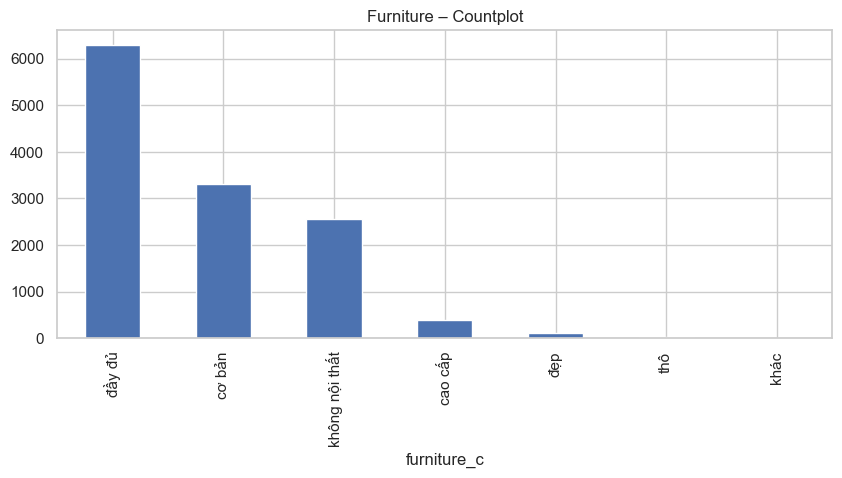

In [50]:
plt.figure(figsize=(10,4))
df_c["furniture_c"].value_counts(dropna=False).plot(kind="bar")
plt.title("Furniture – Countplot")
plt.show()

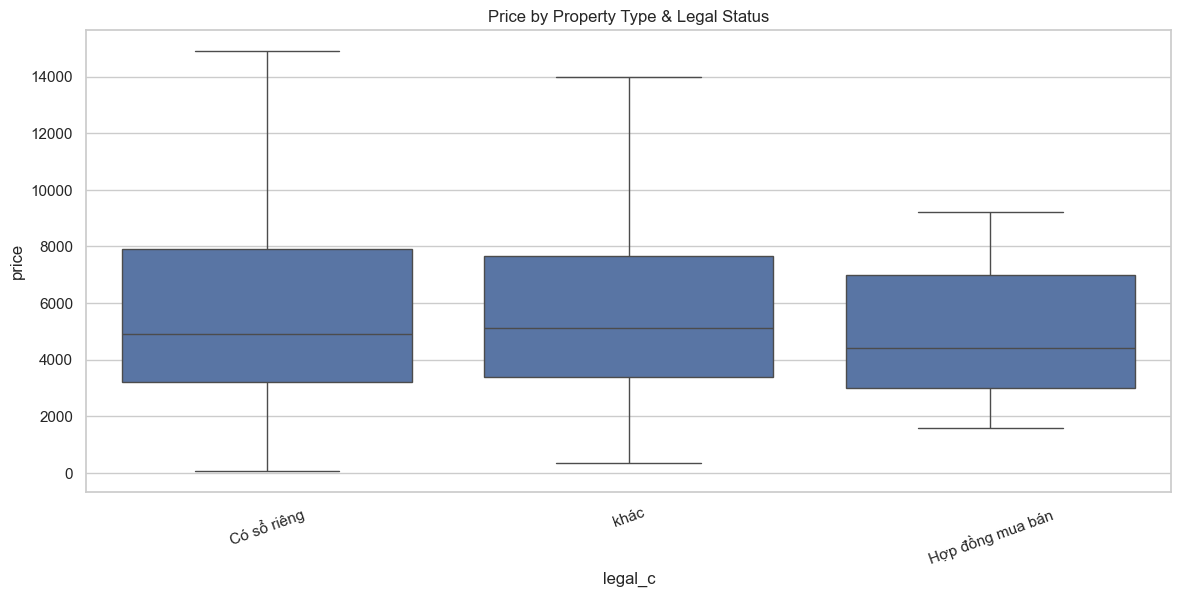

In [51]:
plt.figure(figsize=(14,6))
sns.boxplot(data=df_c, x='legal_c', y='price', showfliers=False)
plt.title("Price by Property Type & Legal Status")
plt.xticks(rotation=20)
plt.show()

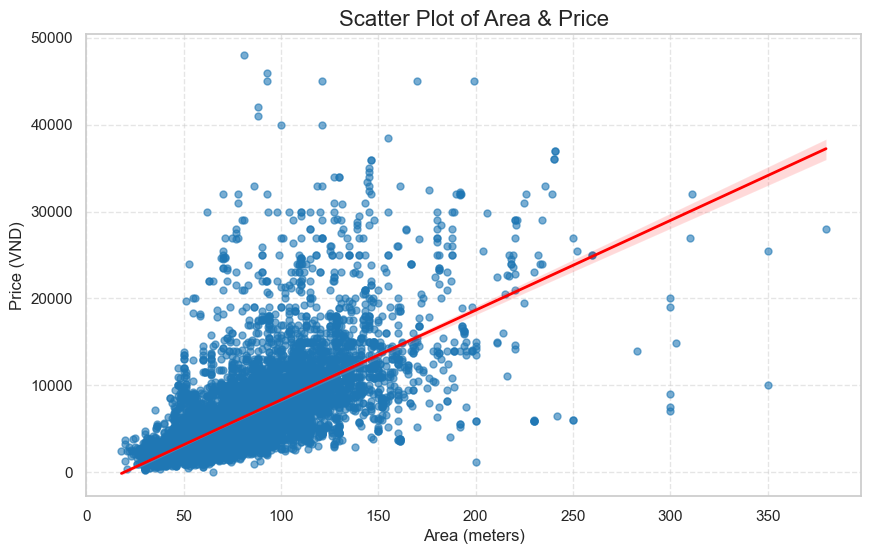

In [52]:
plt.figure(figsize=(10, 6))
sns.regplot(
    x='area',   
    y='price', 
    data=df_c,  
    
    scatter_kws={'color': 'tab:blue', 'alpha': 0.6, 's': 25},
    # Tùy chỉnh đường hồi quy (regression line)
    line_kws={'color': 'red', 'linewidth': 2},
    
    ci=95
)

# 3. Thêm tiêu đề và nhãn trục cho giống hình mẫu
plt.title('Scatter Plot of Area & Price', fontsize=16)
plt.xlabel('Area (meters)', fontsize=12)
plt.ylabel('Price (VND)', fontsize=12)

# 4. Thêm lưới mờ (Tùy chọn, giúp biểu đồ chuyên nghiệp hơn)
plt.grid(True, linestyle='--', alpha=0.5)

# 5. Hiển thị biểu đồ
plt.show()


## Category Handling

In [53]:
def processing(X, categorical_features):
    # Select numerical columns from the original DataFrame
    numerical_features = X.select_dtypes(include=np.number).columns.tolist()
    X_num = X[numerical_features].copy()

    # Process categorical features
    from sklearn.preprocessing import LabelEncoder
    X_cat = X[categorical_features].copy()
    for col in X_cat.columns:
        X_cat[col] = LabelEncoder().fit_transform(X_cat[col].astype(str))

    # Combine numerical and processed categorical DataFrames
    # Ensure both DataFrames have the same index for correct merging
    X_processed = pd.concat([X_num, X_cat], axis=1)

    return X_processed

In [56]:
categorical_features = [ 'n_Bedrooms', "n_Bathrooms", "balcony_dir", "legal_c", "furniture_c","NAME_1","NAME_2","house_dir"]
categorical_features_dfd = [  "legal_c","NAME_1","NAME_2","house_dir"]
dfc = df_c.drop(columns=['url','price(Milion/m2)','frontage', 'driveway', 'n_Floors','index_right','types','date','geometry'])
df_processed_dfc = processing(dfc, categorical_features)

In [57]:
dfc.columns

Index(['price', 'area', 'n_Bedrooms', 'n_Bathrooms', 'house_dir',
       'balcony_dir', 'legal_c', 'furniture_c', 'project', 'lat', 'lon',
       'NAME_1', 'NAME_2'],
      dtype='object')

In [58]:
df_processed_dfc.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12711 entries, 579 to 65172
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   price        12711 non-null  float64
 1   area         12711 non-null  float64
 2   lat          12711 non-null  float64
 3   lon          12711 non-null  float64
 4   n_Bedrooms   12711 non-null  int32  
 5   n_Bathrooms  12711 non-null  int32  
 6   balcony_dir  12711 non-null  int32  
 7   legal_c      12711 non-null  int32  
 8   furniture_c  12711 non-null  int32  
 9   NAME_1       12711 non-null  int32  
 10  NAME_2       12711 non-null  int32  
 11  house_dir    12711 non-null  int32  
dtypes: float64(4), int32(8)
memory usage: 893.7 KB


In [59]:
print(df_processed_dfc[df_processed_dfc.columns].skew())  

price          2.579760
area           1.713555
lat            0.479854
lon            1.405204
n_Bedrooms     0.140520
n_Bathrooms    0.085469
balcony_dir   -0.540056
legal_c        2.375839
furniture_c   -0.463894
NAME_1         1.364503
NAME_2        -0.152438
house_dir     -0.524962
dtype: float64


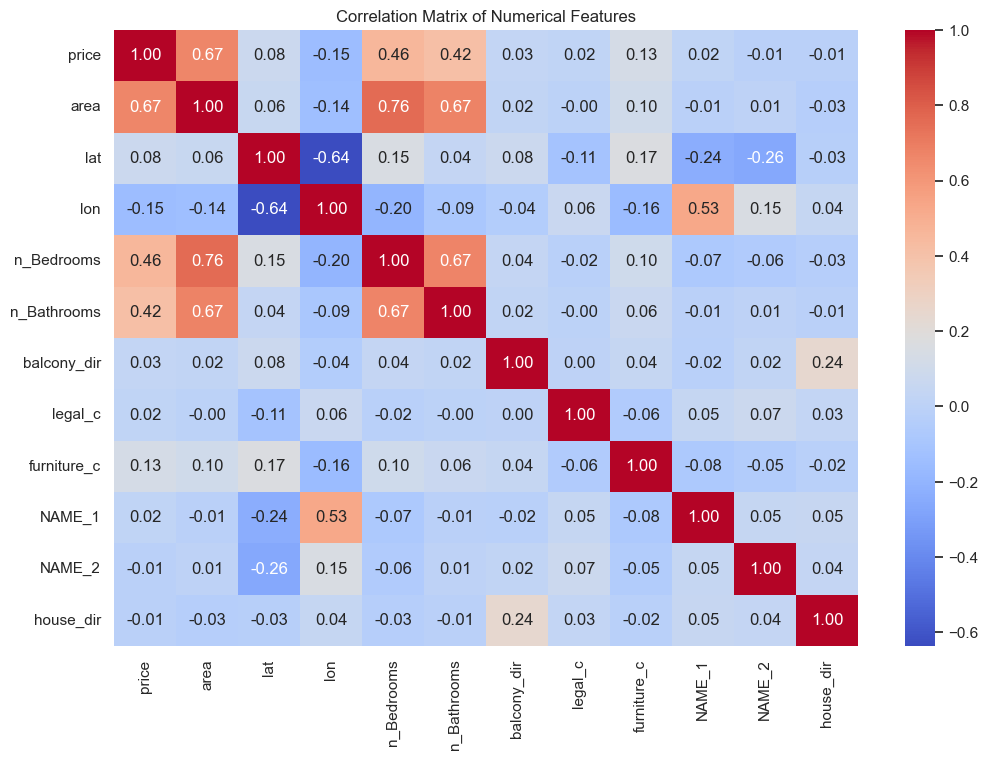

In [60]:
num_cols = df_processed_dfc.select_dtypes(include=['number']).columns
corr_matrix = df_processed_dfc[num_cols].corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

In [61]:
dfc.to_csv("../data/processing/bdsc_data_processed.csv", index=False)


In [ ]:
from serpapi import GoogleSearch
import pandas as pd
import time
from dotenv import load_dotenv
import os
load_dotenv()
# 1. Cấu hình
API_KEY = os.getenv("GOOGLE_MAPS_API_KEY")
# --- HÀM TÌM KIẾM (DÙNG CÚ PHÁP GoogleSearch CŨ) ---

def get_google_maps_data(query, limit_results=20):
    print(f"   -> Đang tìm: {query}")
    try:
        params = {
            "engine": "google_maps",
            "q": query,
            "type": "search",
            "api_key": API_KEY,
            "limit": limit_results 
        }
        
        # --- SỬA LỖI TẠI ĐÂY: Dùng GoogleSearch thay vì Client ---
        search = GoogleSearch(params)
        results = search.get_dict() # Phải có dòng này để lấy dữ liệu
        local_results = results.get("local_results", [])
        
        cleaned_data = []
        for item in local_results:
            if "gps_coordinates" in item:
                cleaned_data.append({
                    "name": item.get("title"),
                    "type": query.split(" tại")[0], 
                    "lat": item["gps_coordinates"]["latitude"],
                    "lon": item["gps_coordinates"]["longitude"],
                    "address": item.get("address")
                })
        return cleaned_data
    except Exception as e:
        print(f"      Lỗi: {e}")
        return []

all_poi_data = []
request_count = 0

# --- CHIẾN THUẬT QUÉT ---

priority_cities = ['Hồ Chí Minh', 'Hà Nội']
keywords = ["Bệnh viện", "Trường đại học", "Chợ"] 

# PHẦN 1: QUÉT SÂU (HCM & HÀ NỘI)
for city in priority_cities:
    print(f"--- ĐANG QUÉT SÂU: {city} ---")
    
    # Kiểm tra xem có dữ liệu quận không
    if 'NAME_1' in df.columns and 'NAME_2' in df.columns:
        # Lấy danh sách quận
        districts = clean[clean['NAME_1'] == city]['NAME_2'].unique()
        
        # Lấy Top 12 quận nhiều nhà nhất
        top_districts = clean[clean['NAME_1'] == city]['NAME_2'].value_counts().head(12).index.tolist()
    else:
        print("Lỗi: Không tìm thấy cột NAME_1, NAME_2 trong DataFrame")
        break

    for district in top_districts:
        if request_count >= 180: break 
        
        for kw in keywords:
            query = f"{kw} tại {district}, {city}"
            
            data = get_google_maps_data(query)
            all_poi_data.extend(data)
            
            request_count += 1
            # Nếu tìm được ít kết quả quá thì không cần nghỉ lâu, ngược lại nghỉ 0.5s
            time.sleep(0.5)

# PHẦN 2: QUÉT VỪA (TỈNH KHÁC)
tier2_provinces = ['Bình Dương', 'Đà Nẵng', 'Khánh Hòa', 'Đồng Nai', 'Hải Phòng']

print("--- ĐANG QUÉT NHÓM 2 (CẤP TỈNH) ---")
for province in tier2_provinces:
    if request_count >= 195: break 
    
    for kw in keywords:
        query = f"{kw} tại {province}"
        
        data = get_google_maps_data(query, limit_results=40) 
        all_poi_data.extend(data)
        
        request_count += 1 

# --- KẾT THÚC ---
print(f"\nĐã thực hiện khoảng {request_count} requests.")

if all_poi_data:
    df_poi = pd.DataFrame(all_poi_data)
    
    # Lọc trùng lặp
    df_poi = df_poi.drop_duplicates(subset=['name', 'lat', 'lon'])
    
    print(f"Tổng tìm thấy: {len(df_poi)} địa điểm.")
    print(df_poi.head())
    
    # Lưu file
    df_poi.to_csv("smart_poi_data.csv", index=False)
    print("Đã lưu file smart_poi_data.csv thành công!")
else:
    print("Không tìm thấy dữ liệu nào.")

--- ĐANG QUÉT SÂU: Hồ Chí Minh ---
   -> Đang tìm: Bệnh viện tại Quận 2, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Quận 2, Hồ Chí Minh
   -> Đang tìm: Chợ tại Quận 2, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Quận 7, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Quận 7, Hồ Chí Minh
   -> Đang tìm: Chợ tại Quận 7, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Quận 9, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Quận 9, Hồ Chí Minh
   -> Đang tìm: Chợ tại Quận 9, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Bình Thạnh, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Bình Thạnh, Hồ Chí Minh
   -> Đang tìm: Chợ tại Bình Thạnh, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Bình Chánh, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Bình Chánh, Hồ Chí Minh
   -> Đang tìm: Chợ tại Bình Chánh, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Tân Phú, Hồ Chí Minh
   -> Đang tìm: Trường đại học tại Tân Phú, Hồ Chí Minh
   -> Đang tìm: Chợ tại Tân Phú, Hồ Chí Minh
   -> Đang tìm: Bệnh viện tại Nhà Bè, Hồ Chí